<a href="https://colab.research.google.com/github/diazonic/opencv-projects/blob/master/face/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face-recognition
# Make sure that you use GPU

In [ ]:
import face_recognition
import cv2
import numpy as np
import os
import glob
from google.colab.patches import cv2_imshow

In [ ]:
mkdir faces
cd faces

In [ ]:
!wget https://cdn.britannica.com/54/188754-050-A3613741/Elon-Musk-2010.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X.jpg

In [ ]:
faces_encodings = []
faces_names = []
cur_direc = os.getcwd()
path = os.path.join(cur_direc, 'faces/')
list_of_files = [f for f in glob.glob(path+'*.jpg')]
number_files = len(list_of_files)
names = list_of_files.copy()

In [ ]:
names

In [ ]:
for i in range(number_files):
    globals()['image_{}'.format(i)] = face_recognition.load_image_file(list_of_files[i])
    globals()['image_encoding_{}'.format(i)] = face_recognition.face_encodings(globals()['image_{}'.format(i)])[0]
    faces_encodings.append(globals()['image_encoding_{}'.format(i)])
# Create array of known names
    names[i] = names[i].replace(cur_direc, "")  
    faces_names.append(names[i])

In [ ]:
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

In [ ]:
!wget https://i.insider.com/5f1052132618b95c16267fa4

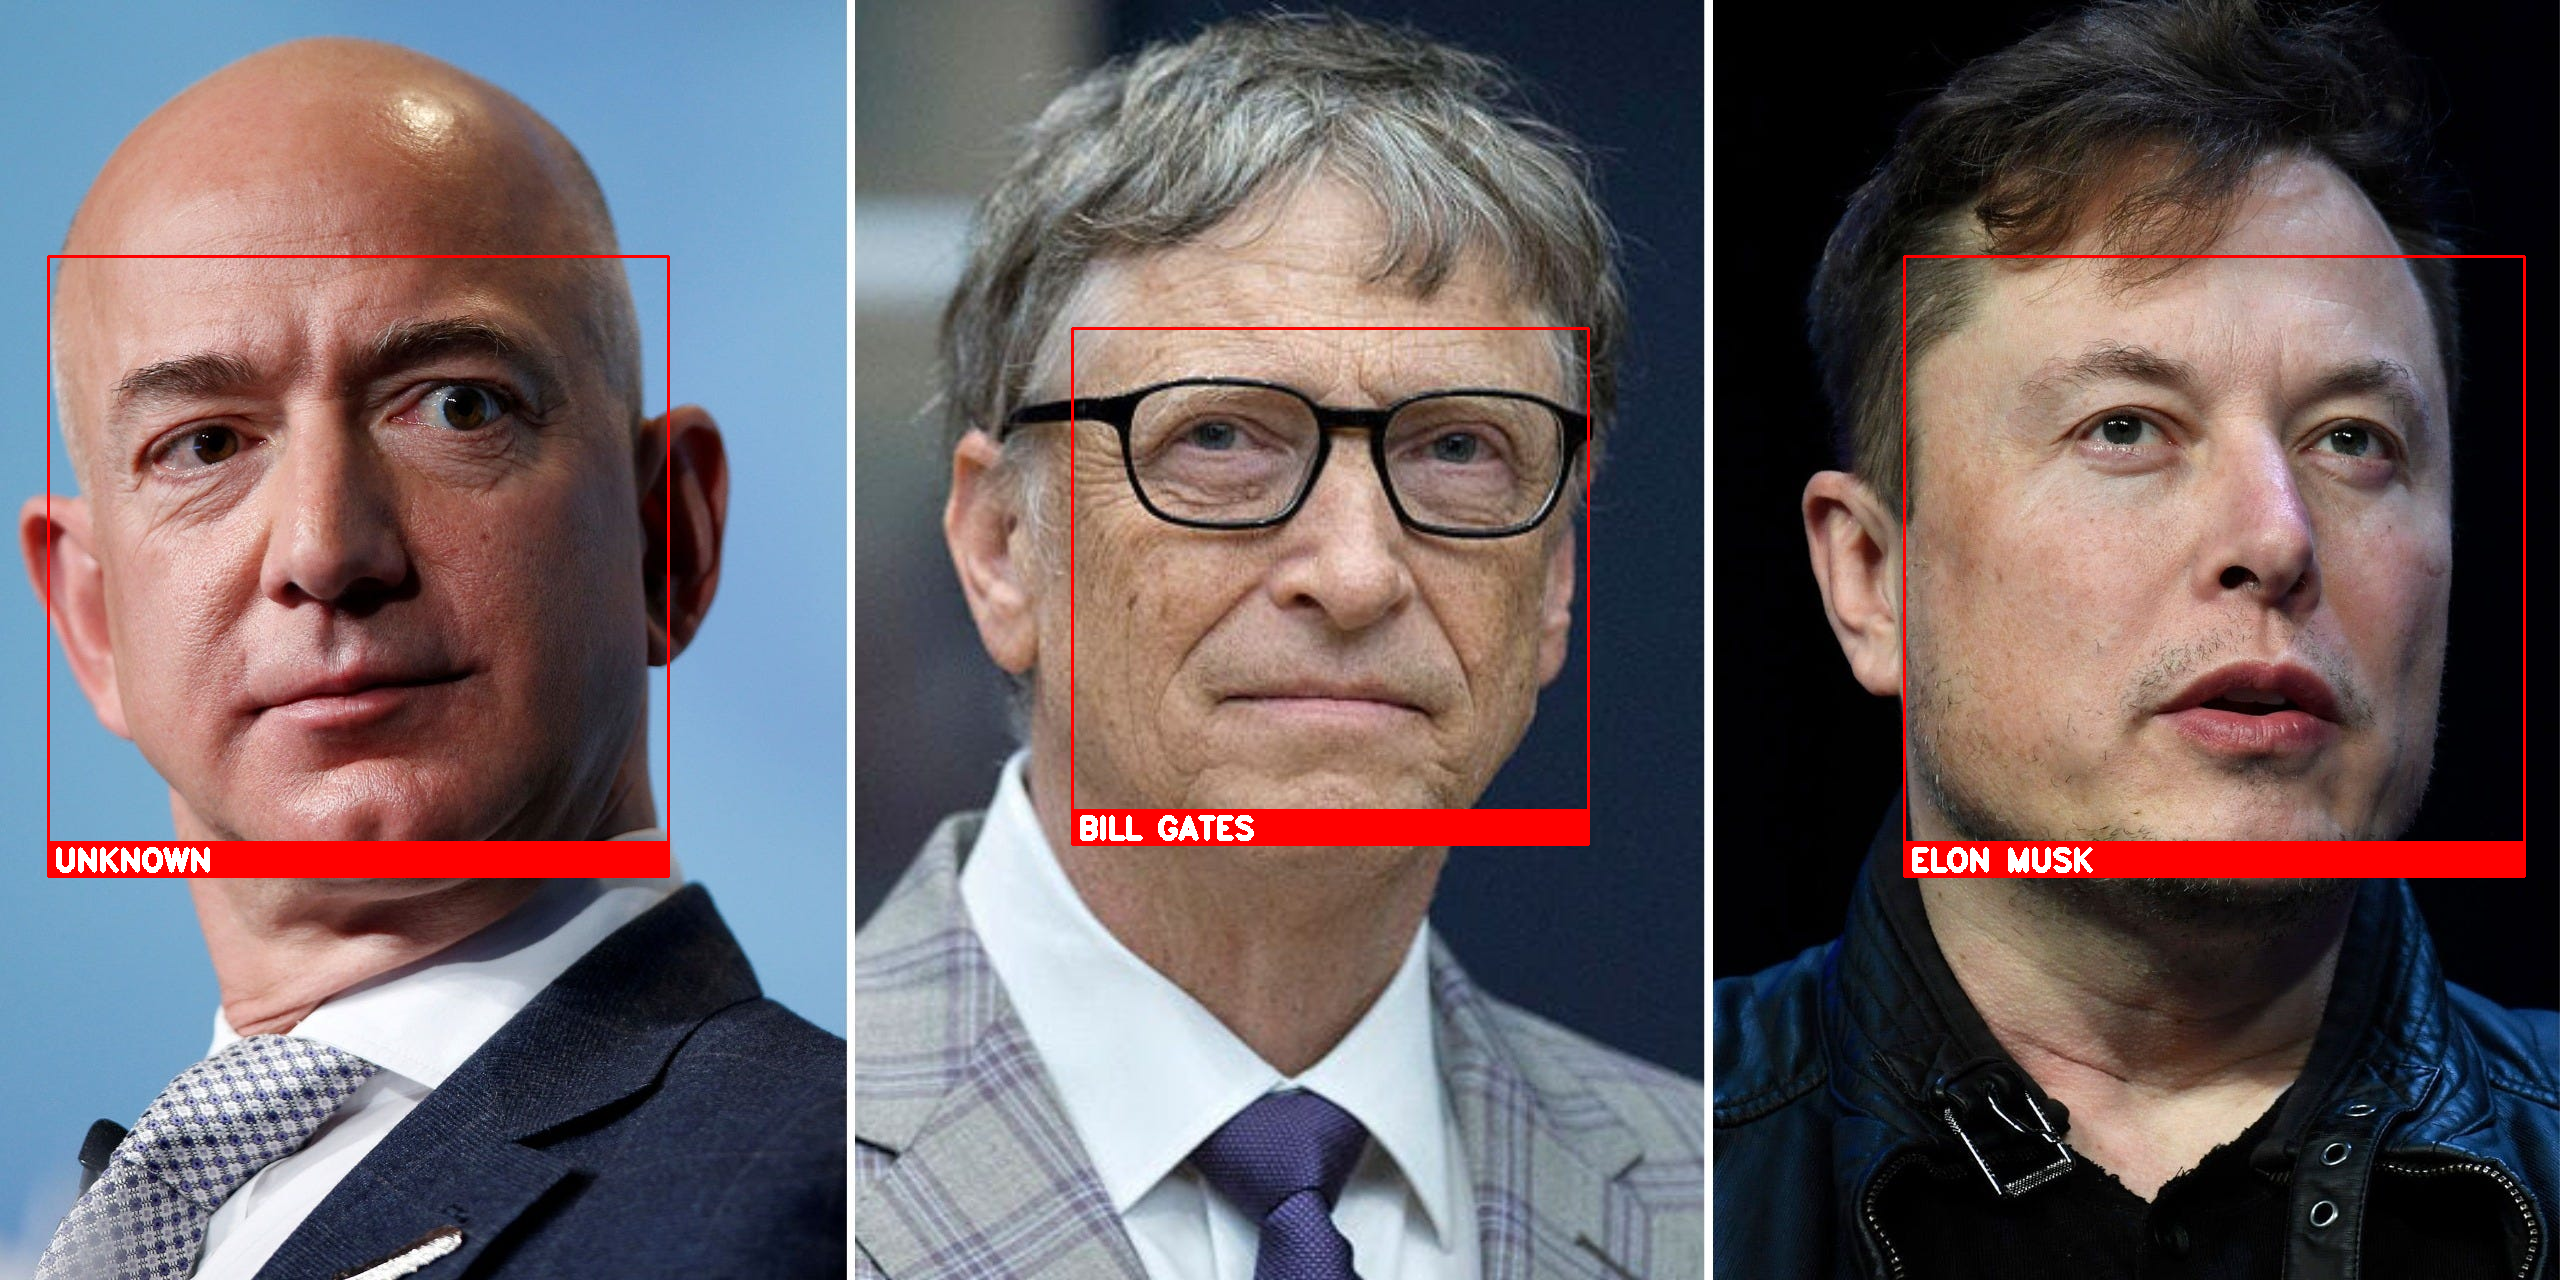

In [31]:
path = '/content/5f1052132618b95c16267fa4'
frame = cv2.imread(path)
small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
rgb_small_frame = small_frame[:, :, ::-1]
if process_this_frame:
    face_locations = face_recognition.face_locations( rgb_small_frame)
    face_encodings = face_recognition.face_encodings( rgb_small_frame, face_locations)
    face_names = []
    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces (faces_encodings, face_encoding)
        name = "Unknown"
        face_distances = face_recognition.face_distance( faces_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = faces_names[best_match_index]
        face_names.append(name)
process_this_frame = not process_this_frame
# Display the results
for (top, right, bottom, left), name in zip(face_locations, face_names):
    top *= 4
    right *= 4
    bottom *= 4
    left *= 4
# Draw a rectangle around the face
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
# Input text label with a name below the face
    cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    name = name.split('/')[-1].split('.')[0].upper()
    cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 3)
# Display the resulting image
cv2_imshow(frame)


In [ ]:
name

In [ ]:
x = '/faces/elon musk.jpg'
x = x.split('/')[-1]
x = x.split('.')[0]
x.upper()

In [ ]:
x = 'Unknown'
x.split('/')[-1].split('.')[0]

In [ ]:
# https://towardsdatascience.com/building-a-face-recognizer-in-python-7fd6630c6340